In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
so_df = pd.read_csv('survey_results_public.csv')
so_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def plot_a_bar_chart(df, column, title):
    '''
    
     Function to Display a bar chart with a title
    
    
    '''
    vals_st = df[column].value_counts()
    (vals_st[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

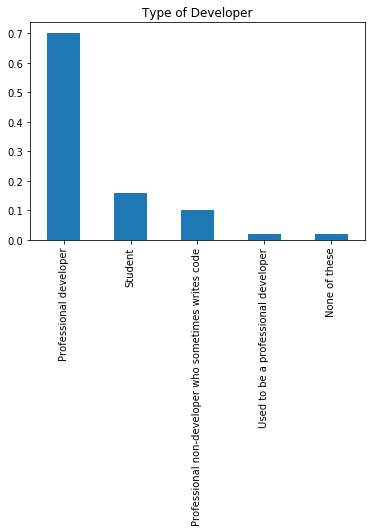

In [5]:
plot_a_bar_chart(so_df, "Professional", "Type of Developer")

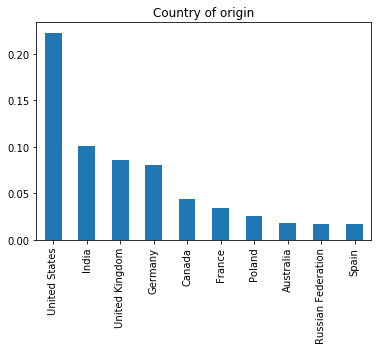

In [6]:
plot_a_bar_chart(so_df, "Country", "Country of origin")

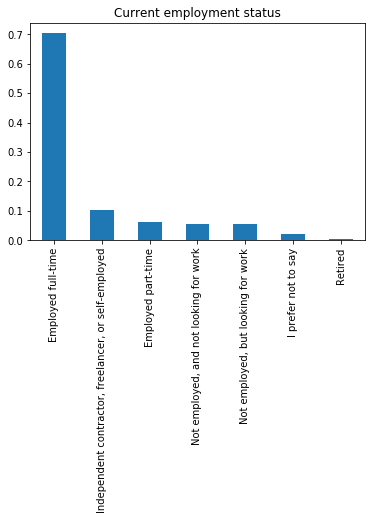

In [7]:
plot_a_bar_chart(so_df, "EmploymentStatus", "Current employment status")

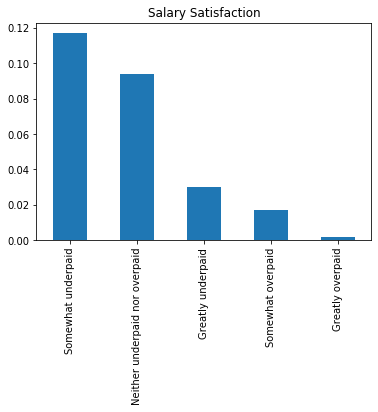

In [8]:
plot_a_bar_chart(so_df, "Overpaid", "Salary Satisfaction")

In [9]:
def data_divide(df):
    '''
    
    Seperating countries based on landscape 
    
    '''
    # For Categorical variables "Country", we seperate them into 
    # three sessions: western, eastern and other
    # The following lists define the countries to western and eastern
    dev_coun = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

    asian = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India', 
           'Indonesia', 'Vietnam']
    
    #Add a new catagory seperating to western and eastern
    df['dev_or_asian'] = df['Country'].apply(lambda x: 'dev' if x in dev_coun else ('asian' if x in asian else 'other'))
    
    return df

In [10]:
def data_preparation(df):
    '''
    
    Return useful columns with query condition
    
    
    '''
    #Get some useful columns for analysis
    useful_columns = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'dev_or_asian', 'Overpaid']
    useful_df = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female') and EmploymentStatus == 'Employed full-time'"))[useful_columns]
    return useful_df

In [11]:
df = data_divide(so_df)


In [12]:

use_df = data_preparation(df)
use_df.head()

,Country,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,dev_or_asian,Overpaid
2,United Kingdom,20 or more years,Employed full-time,8.0,9.0,NaN,NaN,113750.0,dev,Neither underpaid nor overpaid
7,Poland,7 to 8 years,Employed full-time,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,NaN,dev,NaN
8,Colombia,7 to 8 years,Employed full-time,6.0,6.0,I am not interested in new job opportunities,2.0,NaN,other,Neither underpaid nor overpaid
13,Germany,15 to 16 years,Employed full-time,8.0,6.0,I am actively looking for a job,3.0,NaN,dev,NaN
14,United Kingdom,20 or more years,Employed full-time,8.0,8.0,NaN,NaN,100000.0,dev,Somewhat underpaid


In [13]:
def convert_pay(df):
    """
    
    Convert Overpaid from words to integer for calculating the mean
    
    """
    op_map = {
        'Greatly underpaid' : 1,
        'Somewhat underpaid' : 2,
        'Neither underpaid nor overpaid' : 3,
        'Somewhat overpaid' : 4,
        'Greatly overpaid' : 5,
        np.nan: np.nan
    }
    df['Overpaid'] = df['Overpaid'].apply(lambda x: np.nan if x == np.nan else op_map[x] )
    
    return df

In [14]:
use_df = convert_pay(use_df)
comparison = use_df.groupby(['dev_or_asian','YearsCodedJob']).mean()


In [15]:
comparison

CareerSatisfaction  JobSatisfaction  \
dev_or_asian YearsCodedJob                                           
asian        1 to 2 years                6.624444         5.891111   
             10 to 11 years              7.500000         6.550000   
             11 to 12 years              7.342857         6.828571   
             12 to 13 years              7.176471         6.088235   
             13 to 14 years              7.333333         7.666667   
...                                           ...              ...   
other        6 to 7 years                7.180769         6.676923   
             7 to 8 years                7.639405         7.178439   
             8 to 9 years                7.625731         6.836257   
             9 to 10 years               7.621622         7.126126   
             Less than a year            7.171053         6.890351   

                               HoursPerWeek        Salary  Overpaid  
dev_or_asian YearsCodedJob                                           
asian        1 to 2 years          5.653696   7742.553472  2.082418  
             10 to 11 years        3.720000  33318.461069  2.461538  
             11 to 12 years        3.733333  41902.774227  2.384615  
             12 to 13 years        4.937500  53430.910772  2.428571  
             13 to 14 years       26.000000  50170.185287  2.500000  
...                                     ...           ...       ...  
other        6 to 7 years          3.343066  29263.095444  2.460317  
             7 to 8 years          2.537879  31964.359077  2.496241  
             8 to 9 years          2.606742  34049.171061  2.436782  
             9 to 10 years         2.990654  32968.872897  2.512195  
             Less than a year      3.323810  12331.873250  2.325397  

[63 rows x 5 columns]

In [16]:
def handling_experience(df):
    """
    
    Convert the working year to integer for calculating the mean
    
    
    """
    exp_map = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
    
    df_graph = df.reset_index()
    df_graph['YearsCodedJob'] = df_graph['YearsCodedJob'].apply(lambda x: exp_map[x])
    df_graph['YearsCodedJob'] = pd.to_numeric(df_graph['YearsCodedJob'])
    
    return df_graph

In [17]:
comp_graph = handling_experience(comparison)
comp_graph = comp_graph.sort_values(by='YearsCodedJob')

In [18]:
comp_graph.set_index('YearsCodedJob', inplace=True)

Text(0, 0.5, 'Average Salary')

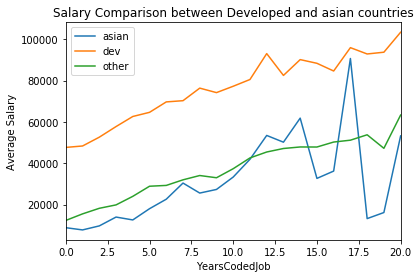

In [19]:
# Comparison of pay disparity between developed and asian countries
comp_graph.groupby('dev_or_asian')['Salary'].plot(legend=True)
plt.title("Salary Comparison between Developed and asian countries");
plt.xlabel('YearsCodedJob')
plt.ylabel('Average Salary')

Text(0, 0.5, 'Overpaid')

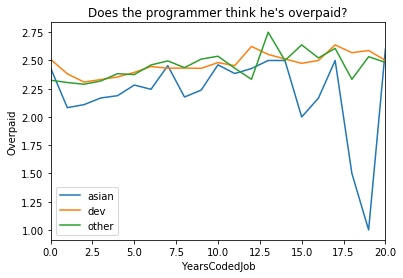

In [20]:
# Pay satisfaction
comp_graph.groupby('dev_or_asian')['Overpaid'].plot(legend=True)
plt.title("Does the programmer think he's overpaid?");
plt.xlabel('YearsCodedJob')
plt.ylabel('Overpaid')

In [21]:
comparison.groupby('dev_or_asian').mean().CareerSatisfaction

dev_or_asian
asian    7.123803
dev      7.576207
other    7.503250
Name: CareerSatisfaction, dtype: float64

In [22]:
comparison.groupby('dev_or_asian').mean().JobSatisfaction

dev_or_asian
asian    6.623020
dev      7.122752
other    7.062847
Name: JobSatisfaction, dtype: float64

In [23]:
comparison.groupby('dev_or_asian').mean().Salary/50

dev_or_asian
asian     627.927284
dev      1529.287081
other     743.536241
Name: Salary, dtype: float64

Text(0, 0.5, 'Job Satisfaction')

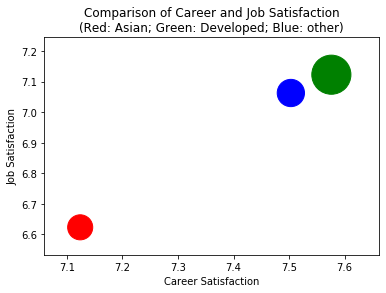

In [25]:
# Final comparison to answer all our questions
plt.scatter(comparison.groupby('dev_or_asian').mean().CareerSatisfaction, comparison.groupby('dev_or_asian').mean().JobSatisfaction, comparison.groupby('dev_or_asian').mean().Salary/50, c=['red','green','blue'])

plt.title('Comparison of Career and Job Satisfaction\n(Red: Asian; Green: Developed; Blue: other)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')